Programme informatique pour la PSSS

In [152]:
#Importation 
import random
import numpy as np
import matplotlib.pyplot as plt


#initilisation du générateur de nombres aléatoire
random.seed(30)



In [172]:
#initialisation des variables

nb_opinion = 100 #nombre d'individus dans le modèle

T = 15 #nombre d'itération dans la simulation 

On étudie le modèle BC (bounded-confidence)

Chaque opinion est actualisée au moment t + 1 suivant la formule :

$$
x_i(t+1)=|I(i, x(t))|_{j \in I(i, x(t))}^{-1} x_j(t) \text { for } t \in T
$$

avec 

$$
I(i, x)=\left\{1 \leq j \leq n|| x_i-x_j \mid \leq \varepsilon_i\right\} 
$$

In [154]:
 
 
def graph_evolution(opinions_over_time,T):

  times=np.arange(T + 1)
  cmap = plt.get_cmap('viridis', nb_opinion)
  plt.plot(times,opinions_over_time, linewidth=0.8)  
  plt.xlabel("opinions")
  plt.ylabel("Temps")

  plt.show()

On commence par étudier le cas où la confiance est symétrique

In [155]:
# Fonction de mise à jour des opinions selon le modèle de confiance limitée dans
#le cas d'une confiance symétrique

def update_opinions_symetry(opinions):

    new_opinions = np.copy(opinions)#on copie pour permettre une actualisation
    # simultanée des opinions 
    
    for i in range(nb_opinion):
        neighbors = [j for j in range(nb_opinion) if abs(opinions[j] - opinions[i]) <= epsilon]
        #On cherche les voisins selon le modèle BC 
        
        if neighbors:
            #mise à jour des opinions des individus
            new_opinions[i] = np.mean([opinions[j] for j in neighbors])
            
    return new_opinions

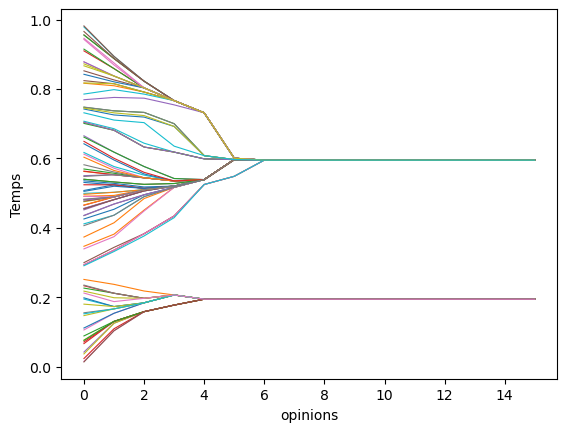

In [156]:
#première simulation dans le cas symétrique

epsilon = 0.2 #initialisation d'epsilon 

opinions_over_time = list()
opinions = np.random.uniform(0, 1, nb_opinion) #génération des opinions au moment t = 0,
#selon une répartition uniforme
opinions_over_time.append(opinions)

# Actualisation des opinions au cours du temps
for time in range(T):
    opinions = update_opinions_symetry(opinions)
    opinions_over_time.append(opinions)

    
#affichage
graph_evolution(opinions_over_time,T)
        



On s'intéresse maintenant au cas où la confiance est asymétrique 


On a désormais : 

$$
I(i, x)=\left\{1 \leq j \leq n \mid-\varepsilon_l \leq x_j-x_i \leq \varepsilon_r\right\} 
$$





In [157]:
# Fonction de mise à jour des opinions selon le modèle de confiance limitée
#on est dans le cas d'une confiance asymétrique


def update_opinions_asymetry(opinions):
    new_opinions = np.copy(opinions) # on copie pour permettre une actualisation
    # simultanée des opinions 

    for i in range(nb_opinion):

        neighbors = [j for j in range(nb_opinion) if -epsilon_left <= opinions[j] - opinions[i] <= epsilon_right ]
        #On cherche les voisins selon le modèle BC 

        if neighbors:
            #mise à jour des opinions des individus
            new_opinions[i] = np.mean([opinions[j] for j in neighbors])
            
    return new_opinions

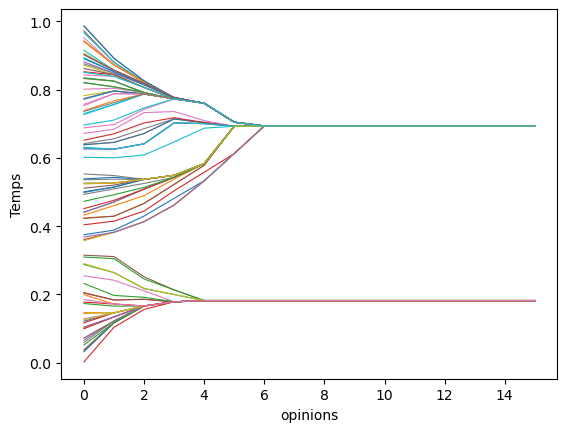

In [171]:
# simulation dans le cas asymétrique

epsilon_left = 0.2 # initialisation des epsilons 
epsilon_right = 0.2

opinions_over_time = list()
opinions = np.random.uniform(0, 1, nb_opinion) # génération des opinions au moment t = 0,
#selon une répartition uniforme

opinions_over_time.append(opinions)

# Actualisation des opinions au cours du temps

for time in range(T):
    opinions = update_opinions_asymetry(opinions)
    opinions_over_time.append(opinions)

    

graph_evolution(opinions_over_time,T)

On étudie désormais le cas où la confiance dépend de la confiance. Il y a désormais un biais envers l'opinion des autres qui dépend de l'opinion de l'individu

On introduit une fonction $f$ de biais, donnée par :
$$f(x)=m x+\frac{1-m}{2}$$

On introduit alors

$$\beta_r(x)=f(x)$$
et
$$\beta_l(x)=1-\beta_r(x)$$
Pour une taille donnée d'intervalle de confiance $\bar{\varepsilon}$, on a pour l'opinion u le biais suivant :

$$\varepsilon_r(u)=\beta_r(u) \bar{\varepsilon}$$
et
$$\varepsilon_l(u)=\beta_l(u) \bar{\varepsilon}$$


In [159]:
#on crée la focntion de biais

def biais_opinion(personnal_opinion, m, epsilon_bar):
    
    f = m*personnal_opinion + (1 - m)/2 #on définie f

    epsilon_right = f*epsilon_bar #création de la confiance à droite
    epsilon_left = epsilon_bar - epsilon_right #création de la confiance à gauche

    return epsilon_right, epsilon_left



In [167]:
def update_opinions_dependant_asymetry(opinions, m, epsilon_bar):
    new_opinions = np.copy(opinions)

    for i in range(nb_opinion):

        personnal_opinion =  opinions[i]#on récupère l'opinion de l'individu i

        epsilon_right, epsilon_left = biais_opinion(personnal_opinion, m, epsilon_bar)
        # on calcule son biais selon son opinion

        neighbors = [j for j in range(nb_opinion) if - epsilon_left <= opinions[j] - opinions[i] <= epsilon_right ]
        #On cherche les voisins selon le modèle BC 

        if neighbors:
            # mise à jour des opinions des individus
            new_opinions[i] = np.mean([opinions[j] for j in neighbors])
    
    return new_opinions



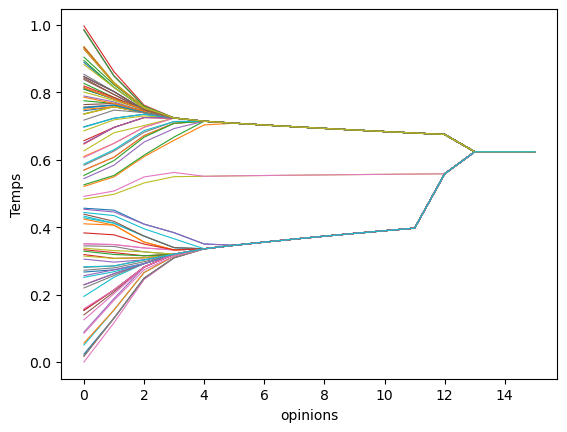

In [161]:
# simulation dans le cas asymétrique avec dépendance à l'opinion

epsilon_bar = 0.6
m = 0.20

opinions_over_time = list()
opinions = np.random.uniform(0, 1, nb_opinion) #génération des opinions au moment
#t = 0, selon une répartition uniforme
opinions_over_time.append(opinions)


# Actualisation des opinions au cours du temps
for time in range(T):
    opinions = update_opinions_dependant_asymetry(opinions, m, epsilon_bar)
    opinions_over_time.append(opinions)

    
# Affichage 
graph_evolution(opinions_over_time,T)

In [191]:
#construction d'un exemple : réseau social 

#On modélise l'opinion sur un réseau social de n individu ayant des opinions initiales suivant une loi 
#normale

#En raison des algorythmes du réseau, il existe un biais de confiance dépendant de m



# simulation dans le cas asymétrique avec dépendance à l'opinion

nb_réseau = 100
epsilon_bar = 0.6
m = 0.99
T = 15




#on crée la focntion de biais

def biais_opinion(personnal_opinion, m, epsilon_bar):
    
    f = m*personnal_opinion + (1 - m)/2 #on définie f

    epsilon_right = f*epsilon_bar #création de la confiance à droite
    epsilon_left = epsilon_bar - epsilon_right #création de la confiance à gauche

    return epsilon_right, epsilon_left



def update_opinions_dependant_asymetry(opinions, m, epsilon_bar):
    new_opinions = np.copy(opinions)

    for i in range(nb_réseau):

        personnal_opinion =  opinions[i]#on récupère l'opinion de l'individu i

        epsilon_right, epsilon_left = biais_opinion(personnal_opinion, m, epsilon_bar)
        # on calcule son biais selon son opinion

        neighbors = [j for j in range(nb_réseau) if - epsilon_left <= opinions[j] - opinions[i] <= epsilon_right ]
        #On cherche les voisins selon le modèle BC 

        if neighbors:
            # mise à jour des opinions des individus
            new_opinions[i] = np.mean([opinions[j] for j in neighbors])
    
    return new_opinions


def graph_evolution(opinions_over_time,T):

  times=np.arange(T + 1)
  cmap = plt.get_cmap('viridis', nb_réseau)
  plt.plot(times,opinions_over_time, linewidth=0.8)  
  plt.xlabel("opinions")
  plt.ylabel("Temps")

  plt.show()








opinions_over_time = list()
opinions = np.random.uniform(0, 1, 50)
opinions = opinions + np.random.uniform(0.5, 0.75, 50)#génération des opinions au moment


opinions_over_time.append(opinions)


# Actualisation des opinions au cours du temps
for time in range(T):
    opinions = update_opinions_dependant_asymetry(opinions, m, epsilon_bar)
    opinions_over_time.append(opinions)

    
# Affichage 
graph_evolution(opinions_over_time,T)





IndexError: index 50 is out of bounds for axis 0 with size 50